In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [3]:
X=pd.read_csv("train.csv")
X_test_full=pd.read_csv("test.csv")
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


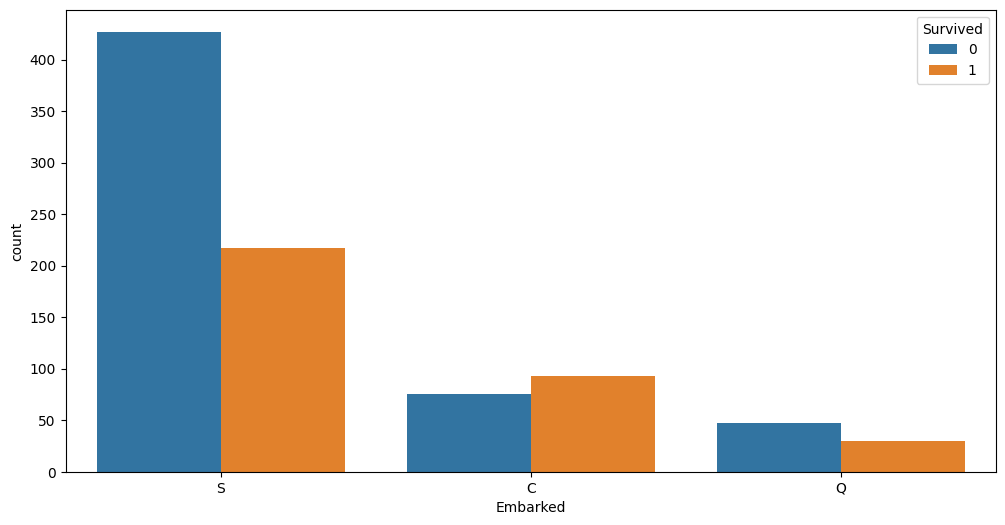

In [5]:
plt.figure(figsize=(12,6))

sns.countplot(x="Embarked",hue="Survived",data=X)
plt.show()

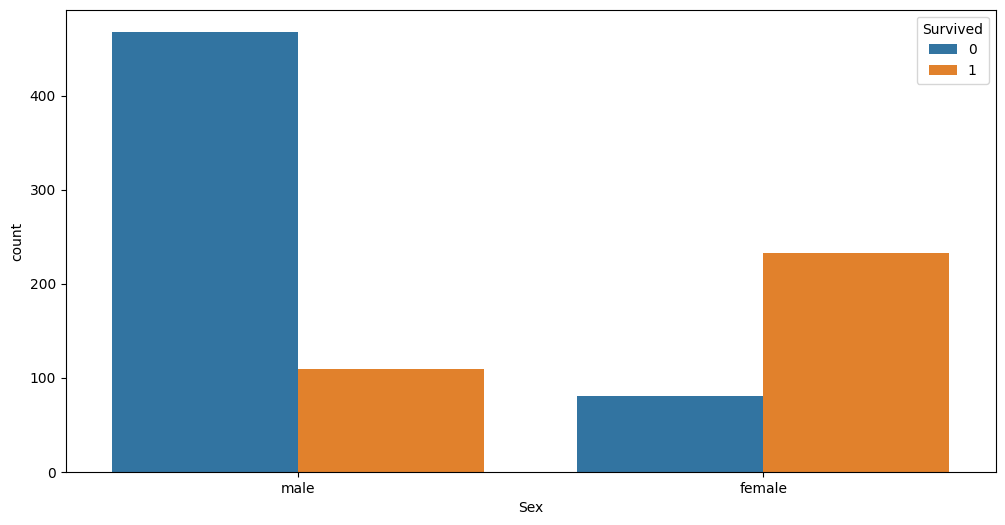

In [6]:
plt.figure(figsize=(12,6))

sns.countplot(x="Sex",hue="Survived",data=X)
plt.show()

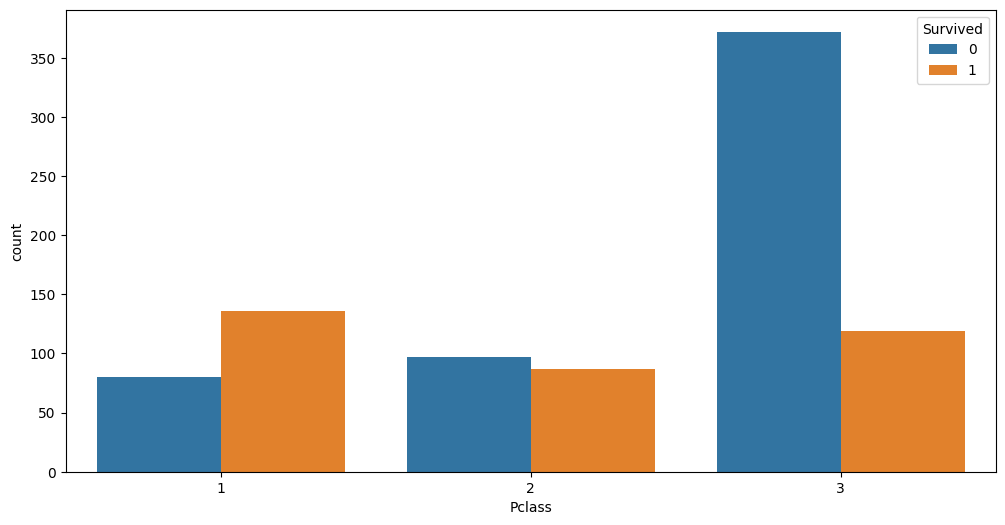

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x="Pclass",hue="Survived",data=X)
plt.show()

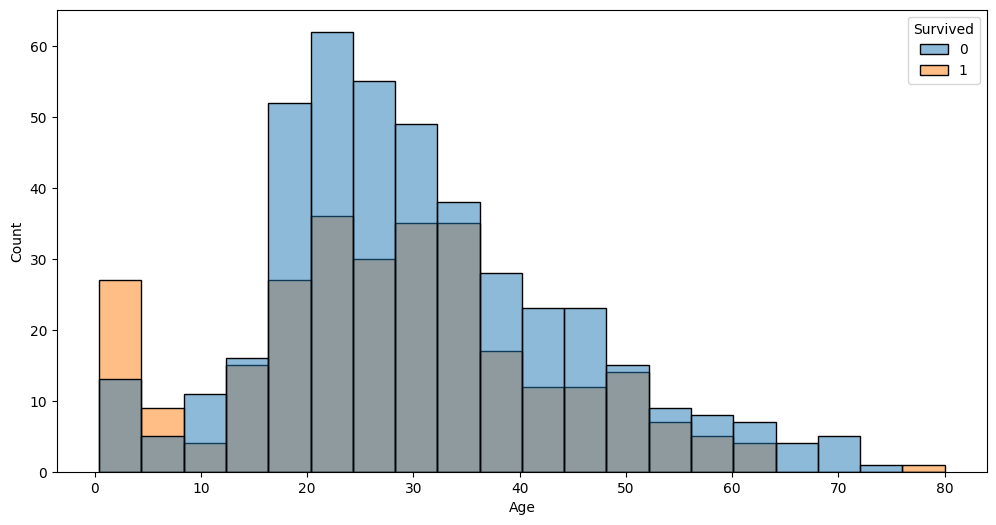

In [8]:
plt.figure(figsize=(12,6))

sns.histplot(x="Age",hue="Survived",data=X)
plt.show()

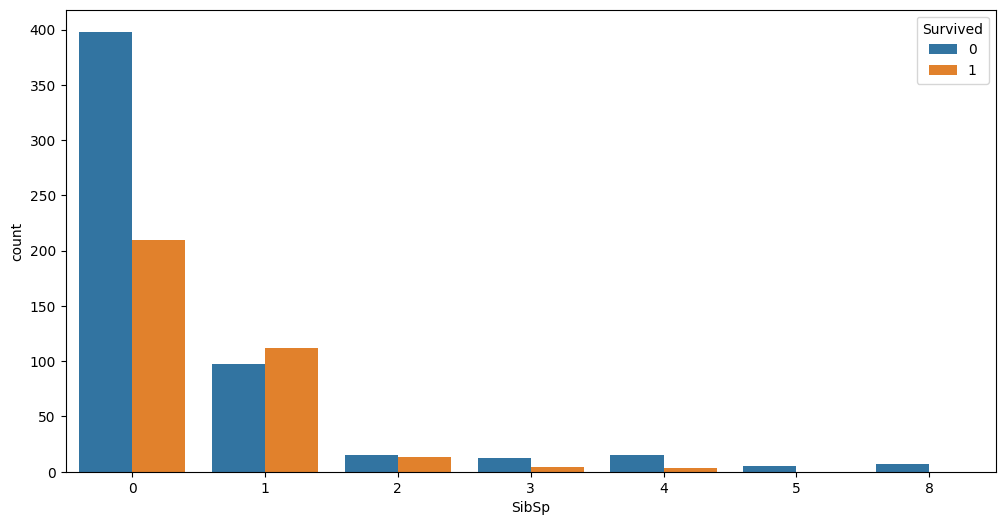

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x="SibSp",hue="Survived",data=X)
plt.show()

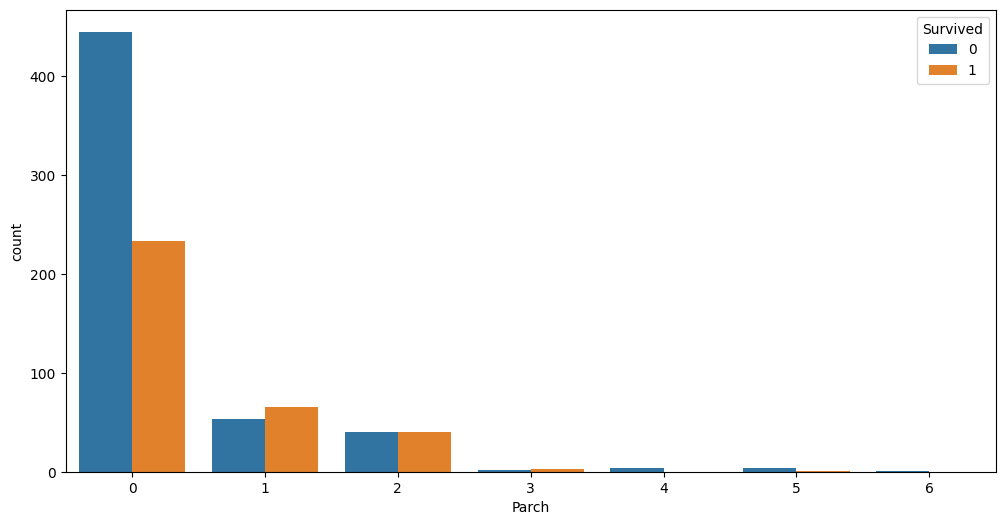

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x="Parch",hue="Survived",data=X)
plt.show()

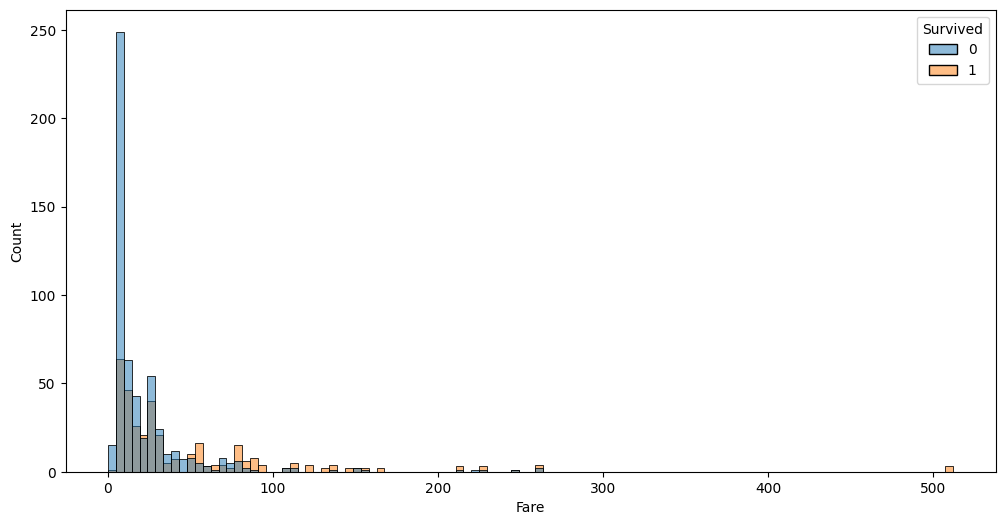

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(x="Fare",hue="Survived",data=X)
plt.show()

In [12]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
X_test_full.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
all_data = pd.concat([X, X_test_full])
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
median_ages = all_data.groupby("Pclass")["Age"].transform("median")
all_data["Age"]=all_data["Age"].fillna(median_ages)

In [16]:
median_fare = all_data.groupby("Pclass")["Fare"].transform("median")
all_data["Fare"]=all_data["Fare"].fillna(median_ages)

In [17]:
mode_embarked=all_data.groupby("Sex")["Embarked"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
all_data["Embarked"]=all_data['Embarked'].fillna(mode_embarked)

In [18]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [19]:
all_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
all_data["FamilySize"] = all_data["SibSp"] + all_data["Parch"] + 1

In [21]:
one_hot_columns = ["Pclass", "Embarked", "Sex"]

encoder = OneHotEncoder(sparse_output=False, dtype=int)
encoded_features = encoder.fit_transform(all_data[one_hot_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(one_hot_columns))
encoded_df.index = all_data.index

In [22]:
df_final = pd.concat([all_data, encoded_df], axis=1)

In [23]:
drop_cols = ["Cabin","Pclass","Embarked","Sex","Ticket","SibSp","Parch","Name","PassengerId"]
df_final.drop(columns=drop_cols, inplace=True)
df_final.columns

Index(['Survived', 'Age', 'Fare', 'FamilySize', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [24]:
df_train = df_final[:891]
df_test = df_final[891:]

In [25]:
df_test.drop(columns=["Survived"],inplace=True)

C:\Users\sujal\AppData\Local\Temp\ipykernel_13776\3207832106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=["Survived"],inplace=True)


In [26]:
X_train = df_train.drop(columns=["Survived"])
y_train = df_train["Survived"].values

X_test = df_test

In [27]:
g_pred=pd.read_csv("gender_submission.csv")

In [28]:
model = LogisticRegression(random_state=16, max_iter=100,C=0.1, penalty='l2')
model.fit(X_train,y_train)
predictions=model.predict(X_test)

acc = accuracy_score(predictions, g_pred["Survived"])

print(acc)

0.9449760765550239


d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
logreg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
predictions2 = grid_search.best_estimator_.predict(X_test)
acc = accuracy_score(predictions, g_pred["Survived"])

print(acc)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.9449760765550239


d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
       

In [30]:
output = pd.DataFrame({
    'PassengerId': X_test_full.PassengerId,
    'Survived': predictions2.astype(int)
})

output.to_csv('submission.csv', index=False)
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
